This variation of the dr olsen preprocessing is slightly modified to work with the 2 class merge version of the training data. It then cleans the 2 class version of the training data. Need to double check if this was before or after the downsampling.

Creating another variation on the initial data

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:

X = pd.read_csv("../Data_Raw/Class4_vs_123_ML_Data/test/X_test_4_v_123.csv")
y = pd.read_csv("../Data_Raw/Class4_vs_123_ML_Data/test/y_test_4_v_123.csv")
df = pd.concat([X, y], axis=1)
df.head()

,ID,Source,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Severity
0,A-5408171,Source1,2022-03-02 06:47:00,2022-03-02 07:08:30,38.755850,-76.993078,38.766170,-76.994268,0.716,Stationary traffic on MD-210 from Fort Washing...,...,False,False,False,True,False,Day,Day,Day,Day,0
1,A-5026095,Source1,2022-08-16 04:19:09,2022-08-16 05:36:19,38.416005,-75.566096,38.418080,-75.565457,0.147,Incident on US-13 NB near OLIPHANT DR Road clo...,...,False,False,False,True,False,Night,Night,Night,Night,1
2,A-6287866,Source1,2021-08-05 19:32:57,2021-08-06 00:39:24,38.188500,-75.898168,38.188365,-75.897030,0.063,Incident on MD-363 SB near RILEY ROBERTS RD Dr...,...,False,False,False,False,False,NaN,NaN,NaN,NaN,0
3,A-5940856,Source1,2021-09-10 16:26:19,2021-09-10 17:44:22,38.938819,-76.912183,38.938869,-76.913163,0.053,Incident on ANNAPOLIS RD near ANNAPOLIS RD Dri...,...,False,False,False,False,False,Day,Day,Day,Day,0
4,A-5750691,Source1,2021-12-22 05:34:00,2021-12-22 07:35:58,39.260792,-76.703399,39.263592,-76.707289,0.284,I-695 INNER LOOP AT EXIT 12B MD 372 WILKENS AV...,...,False,False,False,False,False,Night,Night,Night,Night,1


In [3]:
# TRAIN SET INPUT
#df = data_input("Data_Raw", "train_data", "X_train_2c_downsamp", "y_train_2c_downsamp")
#df.head()

## Drop columns unlikely to be useful

Too focused on timing or too fine grained or unique

In [4]:
df.columns

Index(['ID', 'Source', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'City',
       'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Severity'],
      dtype='object')

In [5]:
df.drop(["ID","Source","Country"],axis=1,inplace=True) # drop clearly unneeded columns

In [6]:
df["Zipcode"] = df.Zipcode.apply(lambda x: str(x).split("-")[0]) # fix zipcodes so that they are all 5 digit

In [7]:
df.drop(["End_Time","End_Lat","End_Lng"],axis=1,inplace=True) #can't know these things before it happens

In [8]:
df.drop(["Start_Lat","Start_Lng","State","City"],axis=1,inplace=True)# so much of location data is redundant and correlated

In [9]:
df.drop(["Timezone","Weather_Timestamp","Airport_Code","Description"],axis=1,inplace=True)

In [10]:
df.drop(["Start_Time","Zipcode","County"],axis=1,inplace=True)

## Street Type

In [11]:
df = df[~df.Street.str.contains("Francis Scott Key Bridge",na=False)|~df.Street.str.contains("Alexandria - Gaylord",na=False)]

In [12]:
print(df.Street.value_counts().shape)
df.Street.value_counts()

(1232,)


Street
I-95 N                  158
I-95 S                  144
Capital Beltway S        87
I-695 E                  81
Capital Beltway E        76
                       ... 
 W Mount Harmony Rd       1
 Bradley Ln               1
Bel Pre Rd                1
 Dominion Rd              1
Old Westminster Pike      1
Name: count, Length: 1232, dtype: int64

In [13]:
def nsew(x,r):
    if x[-1] in ["N","S","E","W"]:
        r= r+x[-1]
    return r

In [14]:
def street_type(x):
    if "Tunl" in x or "Tunnel" in x:
        return "Tunnel"#nsew(x,"Tunnel")
    if "I-" in x or "I " in x:
        return "Interstate"
    if " Dr " in x or " Ave " in x or " Rd " in x or " Xing" in x or " Way " in x:
        return "local"
    if "Beltway" in x:
        return "Beltway"
    if "US-" in x[:4] or "US " in x or "MD-" in x[:4] or "Expy" in x:
        return "Highway"
    if "Hwy" in x or "Fwy" in x or "Highway" in x or "Route" in x or "Connector" in x or "Byp" in x \
        or "Bypass" in x or "Gtwy" in x or "Brg" in x or "Trwy" in x or "Rt" in x or "Conn" in x or "Exp" in x \
        or "Thwy" in x:
        return "Highway"
    if x[-2:] in ["St","Pl","Dr","Sq"]:
        return "local"
    if "Ln" in x or "Rd" in x or "Ct" in x:
        return "local"
    if x[-3:] in ["Way","Cir","Ter","Trl","Plz","Aly","Grn","way","Ext"]:
        return "local"
    if x[-3:] in ["-A", "-B", "-11", "-33"]:
        return "on_off_ramp"
    if x[-1] in ["A", "B", "C"]:
        return "on_off_ramp"
    if "Ave" in x[-5:] or " Blvd" in x or " Pike" in x or "Pkwy" in x or "Crse" in x or "Alameda" in x:
        return "large_local"
    if "Garth" in x or "Spell" in x or "Psge" in x or "Chase" in x or "Cutoff" in x or "Spire" in x:
        return "local"
    if "Overlook" in x or "Battlefield" in x or "Cemetery" in x or "Park" in x or "Base" in x or "Concourse" in x \
        or "Memorial" in x or "Booth's" in x or "Bywy" in x or "Underground" in x:
        return "special"
    if "Loop" in x or "Greenway" in x or "West" in x or "ville" in x or "wood" in x:
        return "local"
    if "St" in x or "Mnr" in x or "Pass" in x or "Run" in x or "Mall" in x or "Row" in x or "Grv":
        return "local"
    return x

In [15]:
df["Street"] = df["Street"].astype(str)
df["Street"] = df.Street.apply(street_type)

In [16]:
df=df.loc[~df.Street.str.contains("special")]


In [17]:
df.Street.value_counts()
# added Intercounty conn as highway
# added rt 100 as highway
# added ocean city exp as highway
# byway as special
# added on_off_ramp
# aberdeen thwy as highway
# east c st 2 as local
# prettyman manor is trailer park, made local
# alexandria-gaylord is bridge, remove
# Urbana Church Pass is local
# olde mill run as local
# harriet tubman byway as special
# poncabird pass as local
# Thompson creek mall as local

Street
local          1320
Interstate     1046
Highway         821
large_local     770
Beltway         325
Tunnel           50
on_off_ramp      20
Name: count, dtype: int64

## Weather Condition

In [18]:
df["Weather_Condition"].value_counts()

Weather_Condition
Fair                       1179
Cloudy                      534
Mostly Cloudy               436
Clear                       382
Partly Cloudy               295
Overcast                    233
Light Rain                  150
Scattered Clouds            120
Light Snow                   60
Fog                          52
Rain                         40
Light Drizzle                24
Fair / Windy                 15
Heavy Rain                   11
Haze                         11
Mostly Cloudy / Windy        10
Light Freezing Rain           8
Wintry Mix                    8
T-Storm                       6
Partly Cloudy / Windy         6
Cloudy / Windy                4
Snow                          4
N/A Precipitation             3
Light Rain with Thunder       3
Drizzle                       2
Shallow Fog                   2
Light Ice Pellets             1
Small Hail                    1
Light Rain Shower             1
Thunder in the Vicinity       1
Rain / Windy          

In [19]:
df = df.loc[(df.Weather_Condition != "Sand")] # too few values

In [20]:
# missing values count as a float
# change to "unknown" instead. Later we can decide if we want to keep
df["Weather_Condition"] = df["Weather_Condition"].fillna("unknown")

In [21]:
df["Weather_Condition"] = df["Weather_Condition"].apply(lambda x: "None" if "N/A" in x else x)

In [22]:
df["Weather_Condition"]=df["Weather_Condition"].apply(lambda x: "Windy" if "Windy" in x else x)

In [23]:
def mapping_1(x):
    tomap = {"Light Drizzle":"Drizzle",
            "Light Rain with Thunder":"Light Thunderstorms and Rain",
            "Thunder in the Vicinity":"Thunder",
            "Heavy Drizzle":"Rain",
            "Mist":"Fog",
            "Light Freezing Drizzle":"Light Freezing Rain"}
    if x in tomap:
        return tomap[x]
    return x

In [24]:
def mapping_2(x):
    tomap = {"Light Rain Shower":"Drizzle",
             "Light Rain":"Drizzle",
            "Light Ice Pellets":"Ice Pellets",
            "Shallow Fog":"Fog"}
    if x in tomap:
        return tomap[x]
    return x

In [25]:
def mapping_3(x):
    tomap = {"Heavy Ice Pellets":"Ice Pellets",
            "Drizzle and Fog":"Fog",
            "Patches of Fog":"Fog",
            "Heavy Snow":"Snow",
            "Heavy Thunderstorms and Rain":"Thunderstorms",
            "T-Storm":"Thunderstorms",
            "Heavy T-Storm":"Thunderstorms",
            "Thunderstorms and Rain":"Thunderstorms"}
    if x in tomap:
        return tomap[x]
    return x

In [26]:
def mapping_4(x):
    tomap = {"Light Snow Shower":"Snow",
            "Light Snow":"Snow",
            "Light Rain Showers":"Drizzle",
            "Light Thunderstorms and Rain":"Thunderstorms"}
    if x in tomap:
        return tomap[x]
    return x

In [27]:
df["Weather_Condition"]=df["Weather_Condition"].apply(mapping_1)                        

In [28]:
df["Weather_Condition"]=df["Weather_Condition"].apply(mapping_2)

In [29]:
df["Weather_Condition"]=df["Weather_Condition"].apply(mapping_3)

In [30]:
df["Weather_Condition"]=df["Weather_Condition"].apply(mapping_4)

In [31]:
df.Weather_Condition.value_counts()

Weather_Condition
Fair                   1179
unknown                 742
Cloudy                  534
Mostly Cloudy           436
Clear                   382
Partly Cloudy           295
Overcast                233
Drizzle                 177
Scattered Clouds        120
Snow                     64
Fog                      54
Rain                     40
Windy                    37
Heavy Rain               11
Haze                     11
Thunderstorms            10
Wintry Mix                8
Light Freezing Rain       8
None                      3
Thunder                   2
Ice Pellets               1
Small Hail                1
Thunderstorm              1
Snow and Sleet            1
Sleet                     1
Name: count, dtype: int64

None and Light Sleet have almost no rows will values, drop them.
Light Freezing Fog has 10 rows. Change to Fog.
Leave others for now. Will need to decide if further combinations are necessary.

In [32]:
df = df.loc[(df.Weather_Condition != "None") & (df.Weather_Condition != "Light Sleet")]

In [33]:
df=df.reset_index(drop=True)

In [34]:
df.shape

(4348, 29)

## Wind Direction

In [35]:
# Can decide later whether to keep or remove rows with unknown values
df["Wind_Direction"] = df.Wind_Direction.fillna("unknown")

In [36]:
df.Wind_Direction.value_counts()

Wind_Direction
CALM        689
unknown     574
Calm        286
NW          256
WNW         249
North       218
S           186
W           173
NNW         171
SSW         163
SSE         143
SW          143
SE          131
N           123
WSW         108
NNE         107
NE          104
ENE          99
E            90
ESE          76
West         75
South        67
VAR          54
East         34
Variable     29
Name: count, dtype: int64

In [37]:
# Basic cleanup of alternative spellings
def wind_map(x):
    tomap = {"CALM":"Calm","South":"S","West":"W","North":"N","East":"E","VAR":"Variable"}
    if x in tomap:
        return tomap[x]
    return x

In [38]:
# Less fine grained values
def wind_2(x):
    tomap = {"WNW":"NW","NNW":"NW","SSW":"SW","SSE":"SE","WSW":"SW","NNE":"NE","ENE":"NE","ESE":"SE"}
    if x in tomap:
        return tomap[x]
    return x

In [39]:
df["Wind_Direction"] = df.Wind_Direction.apply(wind_map)

In [40]:
df["Wind_Direction"] = df.Wind_Direction.apply(wind_2)

In [41]:
df.Wind_Direction.value_counts()

Wind_Direction
Calm        975
NW          676
unknown     574
SW          414
SE          350
N           341
NE          310
S           253
W           248
E           124
Variable     83
Name: count, dtype: int64

## Missing Values: drop columns

In [42]:
df.columns

Index(['Distance(mi)', 'Street', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Severity'],
      dtype='object')

In [43]:
df.shape

(4348, 29)

In [44]:
df.isna().sum()

Distance(mi)                0
Street                      0
Temperature(F)            468
Wind_Chill(F)            1530
Humidity(%)               470
Pressure(in)              434
Visibility(mi)            751
Wind_Direction              0
Wind_Speed(mph)          1021
Precipitation(in)        1668
Weather_Condition           0
Amenity                     0
Bump                        0
Crossing                    0
Give_Way                    0
Junction                    0
No_Exit                     0
Railway                     0
Roundabout                  0
Station                     0
Stop                        0
Traffic_Calming             0
Traffic_Signal              0
Turning_Loop                0
Sunrise_Sunset             13
Civil_Twilight             13
Nautical_Twilight          13
Astronomical_Twilight      13
Severity                    0
dtype: int64

In [45]:
# half of the rows are missing wind chill. Better to just drop the column
df.drop(["Wind_Chill(F)"],axis=1,inplace=True)

In [46]:
# half of the rows are missing precipitation, and weather condition already
# covers that situation more or less. So drop
df.drop(["Precipitation(in)"],axis=1,inplace=True)

<Axes: >

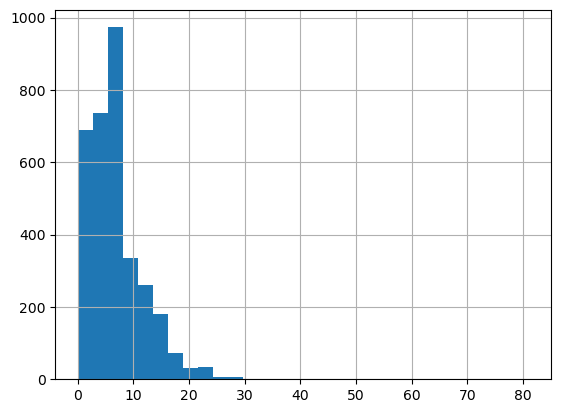

In [47]:
df["Wind_Speed(mph)"].hist(bins=30)

In [48]:
df[df["Wind_Speed(mph)"] > 40].shape[0]

2

Wind speed has a significant number of missing values. It is also a fairly tight distribution other than 11 values that are larger. Although wind speed could be useful in predicting severity, it may not be worth keeping in this situation. I think we try without it first.

In [49]:
df.drop(["Wind_Speed(mph)"],inplace=True,axis=1)

In [50]:
df.isna().sum()

Distance(mi)               0
Street                     0
Temperature(F)           468
Humidity(%)              470
Pressure(in)             434
Visibility(mi)           751
Wind_Direction             0
Weather_Condition          0
Amenity                    0
Bump                       0
Crossing                   0
Give_Way                   0
Junction                   0
No_Exit                    0
Railway                    0
Roundabout                 0
Station                    0
Stop                       0
Traffic_Calming            0
Traffic_Signal             0
Turning_Loop               0
Sunrise_Sunset            13
Civil_Twilight            13
Nautical_Twilight         13
Astronomical_Twilight     13
Severity                   0
dtype: int64

In [51]:
df.dropna().shape

(3545, 26)

It looks like dropping NA values doesn't remove too many rows, there must be rows with multiple NA values. So let's drop NA rows.

In [52]:
df.dropna(inplace=True)

## Twilights

We don't need four different twilights.

In [53]:
df.columns

Index(['Distance(mi)', 'Street', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Weather_Condition',
       'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
       'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
       'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight', 'Severity'],
      dtype='object')

In [54]:
df.drop(['Civil_Twilight','Nautical_Twilight', 'Astronomical_Twilight'],inplace=True,axis=1)

## Any columns have too little info?

In [55]:
for col in ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
       'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
       'Traffic_Signal', 'Turning_Loop']:
    print(df[col].value_counts())

Amenity
False    3524
True       21
Name: count, dtype: int64
Bump
False    3544
True        1
Name: count, dtype: int64
Crossing
False    3331
True      214
Name: count, dtype: int64
Give_Way
False    3536
True        9
Name: count, dtype: int64
Junction
False    3201
True      344
Name: count, dtype: int64
No_Exit
False    3543
True        2
Name: count, dtype: int64
Railway
False    3536
True        9
Name: count, dtype: int64
Roundabout
False    3545
Name: count, dtype: int64
Station
False    3518
True       27
Name: count, dtype: int64
Stop
False    3484
True       61
Name: count, dtype: int64
Traffic_Calming
False    3533
True       12
Name: count, dtype: int64
Traffic_Signal
False    3087
True      458
Name: count, dtype: int64
Turning_Loop
False    3545
Name: count, dtype: int64


Bump, Give_Way, No_Exit, Roundabout, have almost no True values, so drop.
All values in Turning_Loop are identical, so drop.

In [56]:
df.drop(['Bump', 'Give_Way', 'No_Exit', 'Roundabout','Turning_Loop'],inplace=True,axis=1)

Will need to consider if it is worth keeping all of these or combining in some way.

In [57]:
df.columns

Index(['Distance(mi)', 'Street', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Weather_Condition',
       'Amenity', 'Crossing', 'Junction', 'Railway', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Severity'],
      dtype='object')

In [58]:
df.shape

(3545, 18)

In [59]:
df.head(50)

,Distance(mi),Street,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Weather_Condition,Amenity,Crossing,Junction,Railway,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Severity
0,0.716,local,41.0,73.0,30.04,10.0,Calm,Fair,False,False,False,False,False,False,False,True,Day,0
1,0.147,local,66.0,90.0,29.87,10.0,NE,Fair,False,False,False,False,False,False,False,True,Night,1
3,0.053,local,74.0,36.0,29.97,10.0,NW,Mostly Cloudy,False,True,False,False,False,False,False,False,Day,0
4,0.284,on_off_ramp,36.0,93.0,29.50,6.0,Calm,Mostly Cloudy,False,False,True,False,False,False,False,False,Night,1
5,0.014,local,44.1,38.0,30.19,10.0,NW,Clear,False,True,False,False,False,False,False,True,Day,1
6,0.194,Beltway,39.0,94.0,29.82,10.0,Calm,Partly Cloudy,False,False,True,False,False,False,False,False,Night,0
8,0.331,large_local,87.1,53.0,29.97,10.0,N,Clear,False,False,False,False,False,False,False,False,Day,1
9,2.748,local,82.0,70.0,29.85,10.0,S,Fair,False,False,False,False,False,False,False,False,Day,0
10,1.720,large_local,76.5,87.0,30.12,10.0,S,Clear,False,False,True,False,False,False,False,False,Day,1
11,0.072,large_local,74.0,91.0,30.06,7.0,Calm,Fair,True,True,False,False,False,False,False,False,Day,0


In [60]:
df.columns

Index(['Distance(mi)', 'Street', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Weather_Condition',
       'Amenity', 'Crossing', 'Junction', 'Railway', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Severity'],
      dtype='object')

In [61]:
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(3545, 18)
(3489, 18)


In [62]:
df.head()

,Distance(mi),Street,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Weather_Condition,Amenity,Crossing,Junction,Railway,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Severity
0,0.716,local,41.0,73.0,30.04,10.0,Calm,Fair,False,False,False,False,False,False,False,True,Day,0
1,0.147,local,66.0,90.0,29.87,10.0,NE,Fair,False,False,False,False,False,False,False,True,Night,1
3,0.053,local,74.0,36.0,29.97,10.0,NW,Mostly Cloudy,False,True,False,False,False,False,False,False,Day,0
4,0.284,on_off_ramp,36.0,93.0,29.50,6.0,Calm,Mostly Cloudy,False,False,True,False,False,False,False,False,Night,1
5,0.014,local,44.1,38.0,30.19,10.0,NW,Clear,False,True,False,False,False,False,False,True,Day,1


In [63]:
df.columns

Index(['Distance(mi)', 'Street', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Weather_Condition',
       'Amenity', 'Crossing', 'Junction', 'Railway', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Severity'],
      dtype='object')

In [64]:
# Train data needs Data_Cleaned, train_data, X_train_control, y_train_control
# Test data needs Data_Cleaned, test_data, X_test_control, y_test_control
col_class = ['Class']
col_data = ['Street', 'Temperature(F)', 'Humidity(%)',
            'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Weather_Condition',
            'Amenity', 'Crossing', 'Junction', 'Railway', 'Station', 'Stop',
            'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset']

df = df.rename(columns={'Severity' : 'Class'})
df = df.drop_duplicates()

X = df.iloc[:,:-1]
y = df.Class



In [65]:
X.to_csv('../Data_Cleaned/Class4_vs_123_ML_Data/test/X_test_4_v_123.csv', columns = col_data, index = False)
y.to_csv('../Data_Cleaned/Class4_vs_123_ML_Data/test/y_test_4_v_123.csv', columns = col_class, index = False)

# TESTING
#X.to_csv('../Data_Cleaned/test_data/control_2class_X_test.csv', columns = col_data, index = False)
#y.to_csv('../Data_Cleaned/test_data/control_2class_y_test.csv', columns = col_class, index = False)